Amazon Cell-Phone reviews. 
Goal - To predict rating based on the sentiment of the reviews and also to analyse and categorise the reviews as 'positive', 'negative' or 'neutral' 

This notebook contains the pre-processing and modeling part for Amazon reviews on cell phones. 

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
import unicodedata

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jisasv1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jisasv1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

### Load Data

In [3]:
item_reviews= pd.read_csv('/Users/jisasv1/Documents/dataScience/Datasets/Capstone3Data/item_reviews.csv')

In [4]:
item_reviews.head()

,Unnamed: 0,asin,brand,phone_title,url,image,item_overall_rating,reviewUrl,totalReviews,price,originalPrice,name,review_rating,date,verified,review_title,body,helpfulVotes
0,0,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Marcel Thomas,1,"March 5, 2016",True,Stupid phone,DON'T BUY OUT OF SERVICE,
1,1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,William B.,4,"February 9, 2006",False,Exellent Service,I have been with nextel for nearly a year now ...,
2,2,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,K. Mcilhargey,5,"February 7, 2006",False,I love it,"I just got it and have to say its easy to use,...",
3,3,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Stephen Cahill,1,"December 20, 2016",True,Phones locked,1 star because the phones locked so I have to ...,
4,4,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Mihir,5,"December 13, 2009",True,Excellent product,The product has been very good. I had used thi...,


In [5]:
#Let's drop the column Unnamed:0
item_reviews.drop(['Unnamed: 0'], axis=1, inplace=True) 

In [6]:
item_reviews.head()

,asin,brand,phone_title,url,image,item_overall_rating,reviewUrl,totalReviews,price,originalPrice,name,review_rating,date,verified,review_title,body,helpfulVotes
0,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Marcel Thomas,1,"March 5, 2016",True,Stupid phone,DON'T BUY OUT OF SERVICE,
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,William B.,4,"February 9, 2006",False,Exellent Service,I have been with nextel for nearly a year now ...,
2,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,K. Mcilhargey,5,"February 7, 2006",False,I love it,"I just got it and have to say its easy to use,...",
3,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Stephen Cahill,1,"December 20, 2016",True,Phones locked,1 star because the phones locked so I have to ...,
4,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Mihir,5,"December 13, 2009",True,Excellent product,The product has been very good. I had used thi...,


In [7]:
item_reviews.isna().sum()

asin                   0
brand                  0
phone_title            0
url                    0
image                  0
item_overall_rating    0
reviewUrl              0
totalReviews           0
price                  0
originalPrice          0
name                   0
review_rating          0
date                   0
verified               0
review_title           0
body                   0
helpfulVotes           0
dtype: int64

#### Text Cleaning and Pre-Processing

In [8]:
#Remove special characters (Punctuations and other special characters)
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [9]:
#Removing stopwords
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

In [10]:
#Stemming
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text
simple_stemmer("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crashing! hi crash yesterday, our crash daili'

In [11]:
#Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
def lemmatize_text(text):
    lemma = WordNetLemmatizer()
    text =  [lemma.lemmatize(word) for word in text.split()]
    return " ".join(text)
    #text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crashing! his crashed yesterday, ours crash daily'

In [12]:
def normalize_corpus(corpus, html_stripping=False, contraction_expansion=False,
                     accented_char_removal=False, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        #doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            try:
                doc = special_char_pattern.sub(" \\1 ", doc)
            except:
                print(doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits     
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

Now let's use the function defined above,to pre-process our item_reviews dataset.

In [13]:
item_reviews['full_review'] = item_reviews["review_title"].map(str)+ '. ' + item_reviews["body"]

#pre-process text and store the same
item_reviews['cleaned_review'] = normalize_corpus(item_reviews['full_review'])
norm_corpus = list(item_reviews['cleaned_review'])

#show a sample reviews text
item_reviews.iloc[1][['full_review', 'cleaned_review']].to_dict()

{'full_review': 'Exellent Service. I have been with nextel for nearly a year now I started out this time last year with the Motorola i205 and just upgraded to the i265 it is one of the best phones I have ever had the service is the best I have ever had I have no problems making or reciving calls. If you are considering nextel give it a shot they are in my opinion the best cell company out there.',
 'cleaned_review': 'exellent service nextel nearly year started time last year motorola upgraded one best phone ever service best ever no problem making reciving call considering nextel give shot opinion best cell company'}

In [14]:
item_reviews.head()

,asin,brand,phone_title,url,image,item_overall_rating,reviewUrl,totalReviews,price,originalPrice,name,review_rating,date,verified,review_title,body,helpfulVotes,full_review,cleaned_review
0,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Marcel Thomas,1,"March 5, 2016",True,Stupid phone,DON'T BUY OUT OF SERVICE,,Stupid phone. DON'T BUY OUT OF SERVICE,stupid phone dont buy service
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,William B.,4,"February 9, 2006",False,Exellent Service,I have been with nextel for nearly a year now ...,,Exellent Service. I have been with nextel for ...,exellent service nextel nearly year started ti...
2,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,K. Mcilhargey,5,"February 7, 2006",False,I love it,"I just got it and have to say its easy to use,...",,I love it. I just got it and have to say its e...,love got say easy use hear person talking fine...
3,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Stephen Cahill,1,"December 20, 2016",True,Phones locked,1 star because the phones locked so I have to ...,,Phones locked. 1 star because the phones locke...,phone locked star phone locked pay additional ...
4,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Mihir,5,"December 13, 2009",True,Excellent product,The product has been very good. I had used thi...,,Excellent product. The product has been very g...,excellent product product ha good used cell ph...


#### Text Visualization using WordCloud

In [15]:
?WordCloud

By using WordCloud generator let's visualize the reviews text. 
Note: Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. 

In [16]:
#for the entire dataframe
text = " ".join(review for review in item_reviews.full_review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 21826603 words in the combination of all review.


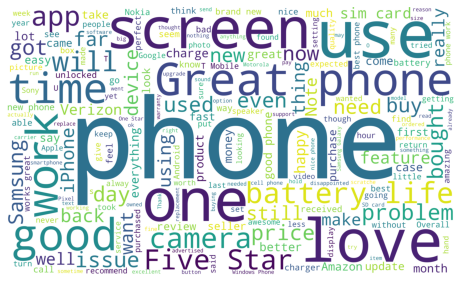

In [17]:
# Generate a word cloud image
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#Reference for Word Cloud https://www.datacamp.com/community/tutorials/wordcloud-python

In [18]:
#cREATE DUMMIES
#X_dummies = pd.get_dummies(item_reviews.brand,prefix='brand')
#X_dummies

In [19]:
#X_dummies_columns = X_dummies.columns

In [20]:
#X= X_dummies.merge(item_reviews['full_review'],left_index=True, right_index=True)
#y= item_reviews.review_rating

In [21]:
# split X and y into training and testing sets
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
# examine the object shapes
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

In [23]:
#Convert the matrix to a dataframe
#import scipy.sparse
#X_train_dtm = pd.DataFrame(X_train_dtm)
#X_train_dt= pd.DataFrame.sparse.from_spmatrix(X_train_dtm)
#X_train_dt
#Refer:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sparse.from_spmatrix.html

In [24]:
#X_train_data = pd.concat([X_train_dt,X_train[X_dummies_columns]],axis=1)

In [25]:
#X_train_data.head()

In [26]:
#X_train_data= X_train_data.merge(y_train, left_index=True, right_index=True)

In [27]:
#X_train_data.dropna(inplace=True)

In [28]:
#y_train.dropna(inplace=True)

In [29]:
#y_train.isna()

#### Filtering 

Let's create a new dataframe for each of the top 3 reviewed cellphone brands and the cellphone with the highest rating-(Xiaomi). We will analyse the customer sentiment for these 4 cell phone brands.

In [30]:
#Filter the reviews dataframe based on cellphone brands
apple= item_reviews[item_reviews["brand"]=="Apple"]
xiaomi= item_reviews[item_reviews["brand"]=="Xiaomi"]
samsung= item_reviews[item_reviews["brand"]=="Samsung"]
motorola=item_reviews[item_reviews["brand"]=="Motorola"]

In [31]:
apple.head()

,asin,brand,phone_title,url,image,item_overall_rating,reviewUrl,totalReviews,price,originalPrice,name,review_rating,date,verified,review_title,body,helpfulVotes,full_review,cleaned_review
15617,B00V8STWY8,Apple,"Apple iPad Air MF529LL/A (32GB, Wi-Fi + at&T, ...",https://www.amazon.com/Apple-MF529LL-Wi-Fi-Sil...,https://m.media-amazon.com/images/I/61ckVdsUlZ...,2.7,https://www.amazon.com/product-reviews/B00V8STWY8,6,219.95,0.0,Amazon Customer,3,"September 26, 2018",True,Not what it says it is,Wrong product... it said iPad Air and it’s an ...,2.0,Not what it says it is. Wrong product... it sa...,not say wrong product said ipad air ipad th ge...
15618,B00V8STWY8,Apple,"Apple iPad Air MF529LL/A (32GB, Wi-Fi + at&T, ...",https://www.amazon.com/Apple-MF529LL-Wi-Fi-Sil...,https://m.media-amazon.com/images/I/61ckVdsUlZ...,2.7,https://www.amazon.com/product-reviews/B00V8STWY8,6,219.95,0.0,Amazon Customer,2,"May 30, 2018",True,Two Stars,I’m had a dent in the back,2.0,Two Stars. I’m had a dent in the back,two star im dent back
15619,B00V8STWY8,Apple,"Apple iPad Air MF529LL/A (32GB, Wi-Fi + at&T, ...",https://www.amazon.com/Apple-MF529LL-Wi-Fi-Sil...,https://m.media-amazon.com/images/I/61ckVdsUlZ...,2.7,https://www.amazon.com/product-reviews/B00V8STWY8,6,219.95,0.0,G. Heard,1,"March 13, 2016",True,No Warranty On Certified Refurbished From Squa...,Purchased this certified refurbished iPad Air ...,13.0,No Warranty On Certified Refurbished From Squa...,no warranty certified refurbished square deal ...
15620,B00V8STWY8,Apple,"Apple iPad Air MF529LL/A (32GB, Wi-Fi + at&T, ...",https://www.amazon.com/Apple-MF529LL-Wi-Fi-Sil...,https://m.media-amazon.com/images/I/61ckVdsUlZ...,2.7,https://www.amazon.com/product-reviews/B00V8STWY8,6,219.95,0.0,Sandra Littlejohn,5,"May 23, 2017",True,Five Stars,Love it!!!!!!,,Five Stars. Love it!!!!!!,five star love
15621,B00V8STWY8,Apple,"Apple iPad Air MF529LL/A (32GB, Wi-Fi + at&T, ...",https://www.amazon.com/Apple-MF529LL-Wi-Fi-Sil...,https://m.media-amazon.com/images/I/61ckVdsUlZ...,2.7,https://www.amazon.com/product-reviews/B00V8STWY8,6,219.95,0.0,Betty m.,1,"February 5, 2017",True,I DO NOT RECOMMEND THIS IPAD,There is no sims card in this. iPad. I assumed...,6.0,I DO NOT RECOMMEND THIS IPAD. There is no sims...,not recommend ipad no sims card ipad assumed s...


Using WordCloud generator let's perform text visualization for each brand.

##### Apple

In [32]:
text = " ".join(review for review in apple.full_review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1017123 words in the combination of all review.


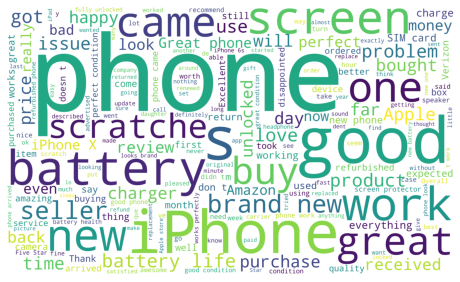

In [33]:
# Generate a word cloud image
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Reference:https://www.datacamp.com/community/tutorials/wordcloud-python
#Ref2:https://www.geeksforgeeks.org/generating-word-cloud-python/

We can see the words 'phone', 'iPhone','good','new','battery', 'screen', 'work' have higher frequencies/importance.

#### Train/Test/Split

Define X and y from the DataFrame, and then split X and y into training and testing sets, using the review text as the only feature and the star rating as the response.

Hint: Keep in mind that X should be a pandas Series (not a DataFrame), since we will pass it to CountVectorizer in the task that follows.

In [34]:
# define X and y
X = apple.full_review
y = apple.review_rating

In [35]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
# examine the object shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3858,)
(1287,)
(3858,)
(1287,)


Use CountVectorizer to create document-term matrices from X_train and X_test.

In [37]:
# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [38]:
# fit and transform X_train into X_train_dtm
X_tr_appl_dtm = vect.fit_transform(X_train)
X_tr_appl_dtm.shape

(3858, 6133)

In [39]:
# transform X_test into X_test_dtm
X_te_appl_dtm = vect.transform(X_test)
X_te_appl_dtm.shape

(1287, 6133)

#### Modeling

##### Using multinomial Naive Bayes to predict the star rating(1 - 5) for the reviews

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [41]:
nb.fit(X_tr_appl_dtm, y_train)

MultinomialNB()

In [42]:
# make class predictions
y_pred_class = nb.predict(X_te_appl_dtm)

In [43]:
# calculate the accuary
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7544677544677545

Null accuracy: accuracy that could be achieved by always predicting the most frequent class

In [44]:
#Calculating null accuarcay
y_test.value_counts().head(1) / y_test.shape

5    0.547009
Name: review_rating, dtype: float64

In [45]:
class_names= ['1','2','3','4','5']

Confusion matrix, without normalization
[[258   2   2   8  37]
 [ 43   4   0   2  16]
 [ 28   1  16   6  30]
 [  9   0   0  15 106]
 [ 17   0   3   6 678]]


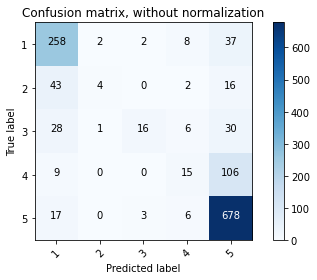

In [46]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
  
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
    
    
    

In [47]:
#print the classification report
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.73      0.84      0.78       307
           2       0.57      0.06      0.11        65
           3       0.76      0.20      0.31        81
           4       0.41      0.12      0.18       130
           5       0.78      0.96      0.86       704

    accuracy                           0.75      1287
   macro avg       0.65      0.44      0.45      1287
weighted avg       0.72      0.75      0.70      1287



Class 1 has high recall, meaning that the model doesn't have a hard time detecting the 1-star reviews,  high precision, meaning that when the model predicts a review is 1-star, it's usually correct.

Class 2,3,4 has low recall, meaning that the model has a hard time detecting the 2,3,4-star reviews, but  quite high precision, meaning that when the model predicts a review's rating it's usually correct.

Class 5 has high recall and precision, probably because 5-star reviews have polarized language, and because the model has a lot of observations to learn from.

#### Samsung

In [48]:
text = " ".join(review for review in samsung.full_review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 9080312 words in the combination of all review.


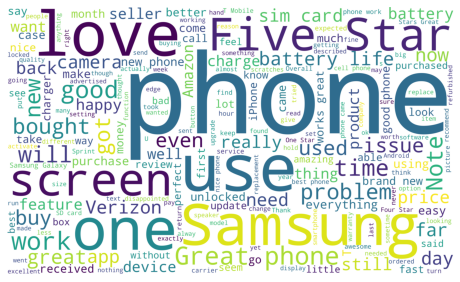

In [49]:
# Generate a word cloud image
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Train/Test/Split(for Samsung)

In [50]:
# define X and y
X = samsung.full_review
y = samsung.review_rating

In [51]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [52]:
# examine the object shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25218,)
(8406,)
(25218,)
(8406,)


Use CountVectorizer to create document-term matrices from X_train and X_test.

In [53]:
#import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [54]:
# fit and transform X_train into X_train_dtm
X_tr_smsg_dtm = vect.fit_transform(X_train)
X_tr_smsg_dtm.shape

(25218, 20543)

In [55]:
# transform X_test into X_test_dtm
X_te_smsg_dtm = vect.transform(X_test)
X_te_smsg_dtm.shape

(8406, 20543)

#### Modeling(Samsung)

In [56]:
##### Using multinomial Naive Bayes to predict the star rating(1 - 5) for the reviews

In [57]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [58]:
nb.fit(X_tr_smsg_dtm, y_train)

MultinomialNB()

In [59]:
# make class predictions
y_pred_smsg = nb.predict(X_te_smsg_dtm)

In [60]:
#calculate the accuary
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_smsg)

0.7500594813228646

In [61]:
#Calculating null accuarcay
y_test.value_counts().head(1) / y_test.shape

5    0.554009
Name: review_rating, dtype: float64

In [62]:
class_names= ['1','2','3','4','5']

Confusion matrix, without normalization
[[1488   19   24   33  119]
 [ 279   37   17   51   94]
 [ 213   10   71   92  188]
 [  88    4   11  306  605]
 [ 119    4   16  115 4403]]


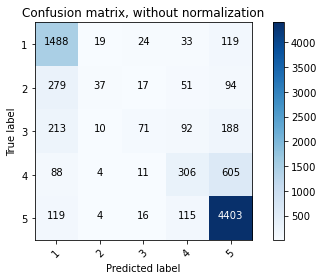

In [63]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
  
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_smsg)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
    
    
    

In [64]:
#print the classification report
print(metrics.classification_report(y_test, y_pred_smsg))

              precision    recall  f1-score   support

           1       0.68      0.88      0.77      1683
           2       0.50      0.08      0.13       478
           3       0.51      0.12      0.20       574
           4       0.51      0.30      0.38      1014
           5       0.81      0.95      0.87      4657

    accuracy                           0.75      8406
   macro avg       0.60      0.47      0.47      8406
weighted avg       0.71      0.75      0.71      8406



Samsung rating classification is also similar to Apple rating classification. Rating 1 and 5 are easy to predict - high recall, also the rating predicted as class 1 or class 5 have high precision - means the predictions are mostly accuarate. 

We can also note that the classifier finds it difficult to predict classs 2,3, 4 (low recall) , but hight precision- meaning rating classification is mostly accuarate(50% precent of the time).

#### Motorola

In [65]:
text = " ".join(review for review in motorola.full_review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3261972 words in the combination of all review.


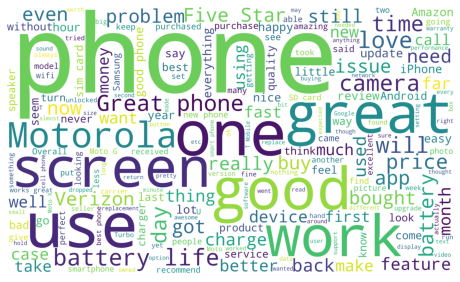

In [66]:
# Generate a word cloud image
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Train/Test/Split(for Motorola)

In [67]:
# define X and y
X = motorola.full_review
y = motorola.review_rating

In [68]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [69]:
#examine the object shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6660,)
(2220,)
(6660,)
(2220,)


Use CountVectorizer to create document-term matrices from X_train and X_test.

In [70]:
#import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [71]:
# fit and transform X_train into X_train_dtm
X_tr_motr_dtm = vect.fit_transform(X_train)
X_tr_motr_dtm.shape

(6660, 12396)

In [72]:
# transform X_test into X_test_dtm
X_te_motr_dtm = vect.transform(X_test)
X_te_motr_dtm.shape

(2220, 12396)

#### Modeling(Motorola)

##### Using multinomial Naive Bayes to predict the star rating(1 - 5) for the reviews

In [73]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [74]:
nb.fit(X_tr_motr_dtm, y_train)

MultinomialNB()

In [75]:
# make class predictions
y_pred_motr = nb.predict(X_te_motr_dtm)

In [76]:
#calculate the accuary
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_motr)

0.7027027027027027

In [77]:
#Calculating null accuarcay
y_test.value_counts().head(1) / y_test.shape

5    0.537387
Name: review_rating, dtype: float64

In [78]:
class_names=['1','2','3','4','5']

Confusion matrix, without normalization
[[ 342    1    6   12   45]
 [  84    0    2   16   39]
 [  37    0    8   20   82]
 [  18    0    1   62  252]
 [  22    1    2   20 1148]]


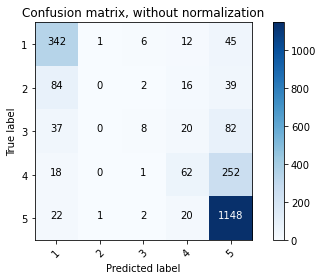

In [79]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
  
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_motr)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
    
    
    

In [80]:
#classification report
print(metrics.classification_report(y_test, y_pred_motr))

              precision    recall  f1-score   support

           1       0.68      0.84      0.75       406
           2       0.00      0.00      0.00       141
           3       0.42      0.05      0.10       147
           4       0.48      0.19      0.27       333
           5       0.73      0.96      0.83      1193

    accuracy                           0.70      2220
   macro avg       0.46      0.41      0.39      2220
weighted avg       0.62      0.70      0.63      2220



Good precision and recall for class 1. High preceision and recall for class 5. Seems like it is almost always easy to predict Rating 1 and 5 and the predictions seems almost accurate for 1 and 5. Class 2 has 0 precision and recall. That's bad. That means our classifier cannot classify any of the class 2 reviews correctly.  

##### Xiaomi

In [81]:
text = " ".join(review for review in xiaomi.full_review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1203319 words in the combination of all review.


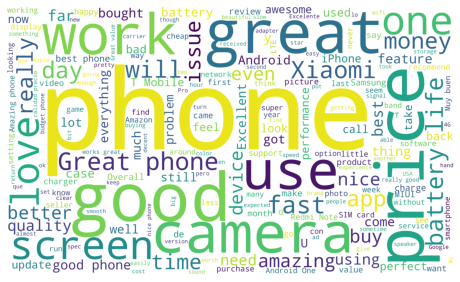

In [82]:
# Generate a word cloud image
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Looks like 'phone', 'screen','price, 'good','camera','work','one','use','love', 'great','Great phone' are the words which have higer frequencies and importance among Xiaomi reviewers. 

##### Train/Test/Split

Define X and y from the new DataFrame, and then split X and y into training and testing sets, using the review text as the only feature and the star rating as the response.

Hint: Keep in mind that X should be a pandas Series (not a DataFrame), since we will pass it to CountVectorizer in the task that follows.

In [83]:
X= xiaomi.full_review
y= xiaomi.review_rating

In [84]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [85]:
# examine the object shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3308,)
(1103,)
(3308,)
(1103,)


Use CountVectorizer to create document-term matrices from X_train and X_test.

In [86]:
#import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [87]:
X_train_xia = vect.fit_transform(X_train)
X_train_xia.shape

(3308, 8331)

In [88]:
#transform X_test into X_test_dtm
X_test_xia = vect.transform(X_test)
X_test_xia.shape

(1103, 8331)

#### Modeling (Xiaomi)

Using Multinomial Naive bayes to classify review rating

In [90]:
nb.fit(X_train_xia, y_train)

MultinomialNB()

In [91]:
# make class predictions
y_pred_xia = nb.predict(X_test_xia)

In [92]:
#calculate the accuary
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_xia)

0.729827742520399

In [93]:
#Calculating null accuarcay
y_test.value_counts().head(1) / y_test.shape

5    0.671804
Name: review_rating, dtype: float64

In [94]:
class_names=['1','2','3','4','5']

Confusion matrix, without normalization
[[ 39   0   3  11  33]
 [ 10   2   2   1  17]
 [  6   0   4  11  53]
 [  2   0   1  22 145]
 [  2   0   0   1 738]]


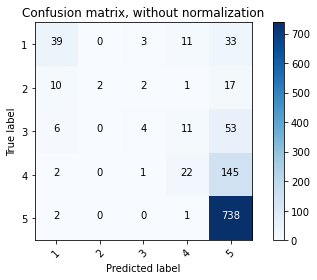

In [95]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
  
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_xia)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
    
    
    

In [96]:
#classification report
print(metrics.classification_report(y_test, y_pred_xia))

              precision    recall  f1-score   support

           1       0.66      0.45      0.54        86
           2       1.00      0.06      0.12        32
           3       0.40      0.05      0.10        74
           4       0.48      0.13      0.20       170
           5       0.75      1.00      0.85       741

    accuracy                           0.73      1103
   macro avg       0.66      0.34      0.36      1103
weighted avg       0.68      0.73      0.66      1103



Class 1 and class 5 have good precision nd recall. Class 2 has a perfect precision score!! and class 5 has a perfect recall score.

#### Sentiment Analysis using VADER 

Let's use VADER to categorise customer sentiment for each of the top 4 brands into 3 classes - Postive, Negative and Nuetral.

Sentiment analysis for Apple

In [97]:
#import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jisasv1/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [98]:
apple['scores'] = apple['full_review'].apply(lambda Description: sid.polarity_scores(Description))
apple.head()

<ipython-input-98-722d9ddd2bb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['scores'] = apple['full_review'].apply(lambda Description: sid.polarity_scores(Description))


,asin,brand,phone_title,url,image,item_overall_rating,reviewUrl,totalReviews,price,originalPrice,name,review_rating,date,verified,review_title,body,helpfulVotes,full_review,cleaned_review,scores
15617,B00V8STWY8,Apple,"Apple iPad Air MF529LL/A (32GB, Wi-Fi + at&T, ...",https://www.amazon.com/Apple-MF529LL-Wi-Fi-Sil...,https://m.media-amazon.com/images/I/61ckVdsUlZ...,2.7,https://www.amazon.com/product-reviews/B00V8STWY8,6,219.95,0.0,Amazon Customer,3,"September 26, 2018",True,Not what it says it is,Wrong product... it said iPad Air and it’s an ...,2.0,Not what it says it is. Wrong product... it sa...,not say wrong product said ipad air ipad th ge...,"{'neg': 0.049, 'neu': 0.761, 'pos': 0.19, 'com..."
15618,B00V8STWY8,Apple,"Apple iPad Air MF529LL/A (32GB, Wi-Fi + at&T, ...",https://www.amazon.com/Apple-MF529LL-Wi-Fi-Sil...,https://m.media-amazon.com/images/I/61ckVdsUlZ...,2.7,https://www.amazon.com/product-reviews/B00V8STWY8,6,219.95,0.0,Amazon Customer,2,"May 30, 2018",True,Two Stars,I’m had a dent in the back,2.0,Two Stars. I’m had a dent in the back,two star im dent back,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
15619,B00V8STWY8,Apple,"Apple iPad Air MF529LL/A (32GB, Wi-Fi + at&T, ...",https://www.amazon.com/Apple-MF529LL-Wi-Fi-Sil...,https://m.media-amazon.com/images/I/61ckVdsUlZ...,2.7,https://www.amazon.com/product-reviews/B00V8STWY8,6,219.95,0.0,G. Heard,1,"March 13, 2016",True,No Warranty On Certified Refurbished From Squa...,Purchased this certified refurbished iPad Air ...,13.0,No Warranty On Certified Refurbished From Squa...,no warranty certified refurbished square deal ...,"{'neg': 0.063, 'neu': 0.909, 'pos': 0.028, 'co..."
15620,B00V8STWY8,Apple,"Apple iPad Air MF529LL/A (32GB, Wi-Fi + at&T, ...",https://www.amazon.com/Apple-MF529LL-Wi-Fi-Sil...,https://m.media-amazon.com/images/I/61ckVdsUlZ...,2.7,https://www.amazon.com/product-reviews/B00V8STWY8,6,219.95,0.0,Sandra Littlejohn,5,"May 23, 2017",True,Five Stars,Love it!!!!!!,,Five Stars. Love it!!!!!!,five star love,"{'neg': 0.0, 'neu': 0.359, 'pos': 0.641, 'comp..."
15621,B00V8STWY8,Apple,"Apple iPad Air MF529LL/A (32GB, Wi-Fi + at&T, ...",https://www.amazon.com/Apple-MF529LL-Wi-Fi-Sil...,https://m.media-amazon.com/images/I/61ckVdsUlZ...,2.7,https://www.amazon.com/product-reviews/B00V8STWY8,6,219.95,0.0,Betty m.,1,"February 5, 2017",True,I DO NOT RECOMMEND THIS IPAD,There is no sims card in this. iPad. I assumed...,6.0,I DO NOT RECOMMEND THIS IPAD. There is no sims...,not recommend ipad no sims card ipad assumed s...,"{'neg': 0.169, 'neu': 0.788, 'pos': 0.043, 'co..."


In [99]:
apple['compound'] = apple['scores'].apply(lambda score_dict: score_dict['compound'])
apple['sentiment_type']=''
apple.loc[apple.compound>0,'sentiment_type']='POSITIVE'
apple.loc[apple.compound==0,'sentiment_type']='NEUTRAL'
apple.loc[apple.compound<0,'sentiment_type']='NEGATIVE'

<ipython-input-99-8d74848f076d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['compound'] = apple['scores'].apply(lambda score_dict: score_dict['compound'])
<ipython-input-99-8d74848f076d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['sentiment_type']=''
/Users/jisasv1/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

POSITIVE    3387
NEGATIVE    1227
NEUTRAL      531
Name: sentiment_type, dtype: int64


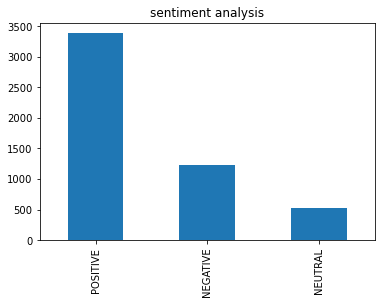

In [100]:
apple.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")
apple_sentiment = apple.sentiment_type.value_counts()
print(apple_sentiment)

Positive review percentage - 3387/6315 = 53.6 percent
Negative review percentage - 1227/6315 = 19.4 percent 
Nuetral review percentage - 531/6315 = 8.4 percent

Sentiment Analysis for Samsung

In [103]:
samsung['scores'] = samsung['full_review'].apply(lambda Description: sid.polarity_scores(Description))
samsung.head()

<ipython-input-103-d3e762f16267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung['scores'] = samsung['full_review'].apply(lambda Description: sid.polarity_scores(Description))


,asin,brand,phone_title,url,image,item_overall_rating,reviewUrl,totalReviews,price,originalPrice,name,review_rating,date,verified,review_title,body,helpfulVotes,full_review,cleaned_review,scores
65,B0029F2O3A,Samsung,"Samsung Alias2 U750 Phone, Black (Verizon Wire...",https://www.amazon.com/Samsung-Alias2-Phone-Ve...,https://m.media-amazon.com/images/I/41HWHpfPlM...,3.0,https://www.amazon.com/product-reviews/B0029F2O3A,29,0.0,0.0,P. Dharmavarapu,1,"September 23, 2009",True,Worst Experience with Amazon,This is probably the wrost experience i had wi...,1.0,Worst Experience with Amazon. This is probably...,worst experience amazon probably wrost experie...,"{'neg': 0.05, 'neu': 0.819, 'pos': 0.131, 'com..."
66,B0029F2O3A,Samsung,"Samsung Alias2 U750 Phone, Black (Verizon Wire...",https://www.amazon.com/Samsung-Alias2-Phone-Ve...,https://m.media-amazon.com/images/I/41HWHpfPlM...,3.0,https://www.amazon.com/product-reviews/B0029F2O3A,29,0.0,0.0,petlover,3,"March 9, 2010",False,A simple phone for texting and making calls,"By simple I mean that in a good way, having co...",1.0,A simple phone for texting and making calls. B...,simple phone texting making call simple mean g...,"{'neg': 0.047, 'neu': 0.79, 'pos': 0.163, 'com..."
67,B0029F2O3A,Samsung,"Samsung Alias2 U750 Phone, Black (Verizon Wire...",https://www.amazon.com/Samsung-Alias2-Phone-Ve...,https://m.media-amazon.com/images/I/41HWHpfPlM...,3.0,https://www.amazon.com/product-reviews/B0029F2O3A,29,0.0,0.0,John Doe,4,"July 9, 2009",False,Solid Phone,Just recently got this phone as a replacement ...,22.0,Solid Phone. Just recently got this phone as a...,solid phone recently got phone replacement hap...,"{'neg': 0.033, 'neu': 0.807, 'pos': 0.159, 'co..."
68,B0029F2O3A,Samsung,"Samsung Alias2 U750 Phone, Black (Verizon Wire...",https://www.amazon.com/Samsung-Alias2-Phone-Ve...,https://m.media-amazon.com/images/I/41HWHpfPlM...,3.0,https://www.amazon.com/product-reviews/B0029F2O3A,29,0.0,0.0,M. Brennan,3,"October 13, 2010",False,I like it but a few shortcomings are significa...,"Good overall phone, bluetooth so far syncs wel...",3.0,I like it but a few shortcomings are significa...,like shortcoming significant enough wouldnt bu...,"{'neg': 0.084, 'neu': 0.825, 'pos': 0.091, 'co..."
69,B0029F2O3A,Samsung,"Samsung Alias2 U750 Phone, Black (Verizon Wire...",https://www.amazon.com/Samsung-Alias2-Phone-Ve...,https://m.media-amazon.com/images/I/41HWHpfPlM...,3.0,https://www.amazon.com/product-reviews/B0029F2O3A,29,0.0,0.0,D. Kashmiri,2,"September 23, 2009",False,Not an upgrade over original Alias,"I loved my Samsung Alias, as most Alias owners...",4.0,Not an upgrade over original Alias. I loved my...,not upgrade original alias loved samsung alias...,"{'neg': 0.075, 'neu': 0.798, 'pos': 0.126, 'co..."


In [104]:
samsung['compound'] = samsung['scores'].apply(lambda score_dict: score_dict['compound'])
samsung['sentiment_type']=''
samsung.loc[samsung.compound>0,'sentiment_type']='POSITIVE'
samsung.loc[samsung.compound==0,'sentiment_type']='NEUTRAL'
samsung.loc[samsung.compound<0,'sentiment_type']='NEGATIVE'

<ipython-input-104-510f14ab31e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung['compound'] = samsung['scores'].apply(lambda score_dict: score_dict['compound'])
<ipython-input-104-510f14ab31e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung['sentiment_type']=''
/Users/jisasv1/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

POSITIVE    23476
NEGATIVE     6989
NEUTRAL      3159
Name: sentiment_type, dtype: int64


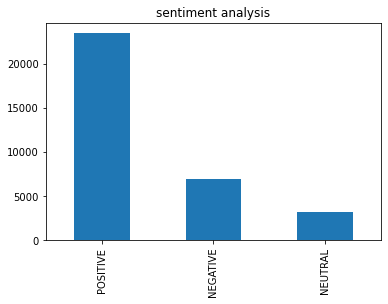

In [105]:
samsung.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")
samsung_sentiment = samsung.sentiment_type.value_counts()
print(samsung_sentiment)

Postive sentiment percentage - 23476/37701 = 62.2 percent
Negative sentiment percentage - 6989/37701 = 18.5 percent
Nuetral sentiment percentage - 3159/37701 = 8.3 percent

Sentiment Analysis for Motorola

In [106]:
motorola['scores'] = motorola['full_review'].apply(lambda Description: sid.polarity_scores(Description))
motorola.head()

<ipython-input-106-676202ea6119>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorola['scores'] = motorola['full_review'].apply(lambda Description: sid.polarity_scores(Description))


,asin,brand,phone_title,url,image,item_overall_rating,reviewUrl,totalReviews,price,originalPrice,name,review_rating,date,verified,review_title,body,helpfulVotes,full_review,cleaned_review,scores
0,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Marcel Thomas,1,"March 5, 2016",True,Stupid phone,DON'T BUY OUT OF SERVICE,,Stupid phone. DON'T BUY OUT OF SERVICE,stupid phone dont buy service,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp..."
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,William B.,4,"February 9, 2006",False,Exellent Service,I have been with nextel for nearly a year now ...,,Exellent Service. I have been with nextel for ...,exellent service nextel nearly year started ti...,"{'neg': 0.059, 'neu': 0.788, 'pos': 0.153, 'co..."
2,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,K. Mcilhargey,5,"February 7, 2006",False,I love it,"I just got it and have to say its easy to use,...",,I love it. I just got it and have to say its e...,love got say easy use hear person talking fine...,"{'neg': 0.133, 'neu': 0.625, 'pos': 0.242, 'co..."
3,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Stephen Cahill,1,"December 20, 2016",True,Phones locked,1 star because the phones locked so I have to ...,,Phones locked. 1 star because the phones locke...,phone locked star phone locked pay additional ...,"{'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound..."
4,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,Mihir,5,"December 13, 2009",True,Excellent product,The product has been very good. I had used thi...,,Excellent product. The product has been very g...,excellent product product ha good used cell ph...,"{'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'comp..."


In [107]:
motorola['compound'] = motorola['scores'].apply(lambda score_dict: score_dict['compound'])
motorola['sentiment_type']=''
motorola.loc[motorola.compound>0,'sentiment_type']='POSITIVE'
motorola.loc[motorola.compound==0,'sentiment_type']='NEUTRAL'
motorola.loc[motorola.compound<0,'sentiment_type']='NEGATIVE'

<ipython-input-107-25ae91f96898>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorola['compound'] = motorola['scores'].apply(lambda score_dict: score_dict['compound'])
<ipython-input-107-25ae91f96898>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorola['sentiment_type']=''
/Users/jisasv1/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

POSITIVE    6501
NEGATIVE    1732
NEUTRAL      647
Name: sentiment_type, dtype: int64


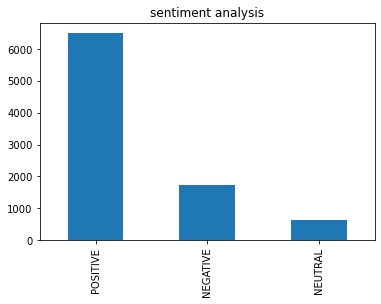

In [108]:
motorola.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")
motorola_sentiment = motorola.sentiment_type.value_counts()
print(motorola_sentiment)

positive sentiment percentage = 6501/9419 = 69 percent
negative sentiment percentage = 1732/9419 = 18.3 percent
neutral sentiment percentage = 647/9419 =   6.8 percent

Xiaomi sentiment analysis using VADER

In [109]:
xiaomi['scores'] = xiaomi['full_review'].apply(lambda Description: sid.polarity_scores(Description))
xiaomi.head()

<ipython-input-109-ae512d198c14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xiaomi['scores'] = xiaomi['full_review'].apply(lambda Description: sid.polarity_scores(Description))


,asin,brand,phone_title,url,image,item_overall_rating,reviewUrl,totalReviews,price,originalPrice,name,review_rating,date,verified,review_title,body,helpfulVotes,full_review,cleaned_review,scores
49128,B07F3YGL26,Xiaomi,Xiaomi Redmi S2 (32GB 3GB RAM) with AI Smart S...,https://www.amazon.com/Cameras-Display-Unlocke...,https://m.media-amazon.com/images/I/41NTLwPYT6...,5.0,https://www.amazon.com/product-reviews/B07F3YGL26,1,139.99,155.0,JACQUILINE JUMBA,5,"April 19, 2019",True,Quality,I just love it.,,Quality. I just love it.,quality love,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp..."
49166,B07FM9913M,Xiaomi,"Unlocked GOLD Xiaomi Mi A2, 4GB 64GB, Dual SIM...",https://www.amazon.com/Xiaomi-64GB-4GB-5-99-In...,https://m.media-amazon.com/images/I/61w4AKhyLz...,4.2,https://www.amazon.com/product-reviews/B07FM9913M,453,159.49,0.0,wliston86,5,"December 17, 2018",True,Amazing Phone - Fast Processor - Great Build Q...,FULL REVIEW ON PHONE - So look this phone is g...,130.0,Amazing Phone - Fast Processor - Great Build Q...,amazing phone fast processor great build quali...,"{'neg': 0.029, 'neu': 0.828, 'pos': 0.143, 'co..."
49167,B07FM9913M,Xiaomi,"Unlocked GOLD Xiaomi Mi A2, 4GB 64GB, Dual SIM...",https://www.amazon.com/Xiaomi-64GB-4GB-5-99-In...,https://m.media-amazon.com/images/I/61w4AKhyLz...,4.2,https://www.amazon.com/product-reviews/B07FM9913M,453,159.49,0.0,B. Devero,4,"October 25, 2018",True,"Great phone, many pros and only minor cons",Probably the most powerful (or close to) devic...,54.0,"Great phone, many pros and only minor cons. Pr...",great phone many pro minor con probably powerf...,"{'neg': 0.078, 'neu': 0.715, 'pos': 0.208, 'co..."
49168,B07FM9913M,Xiaomi,"Unlocked GOLD Xiaomi Mi A2, 4GB 64GB, Dual SIM...",https://www.amazon.com/Xiaomi-64GB-4GB-5-99-In...,https://m.media-amazon.com/images/I/61w4AKhyLz...,4.2,https://www.amazon.com/product-reviews/B07FM9913M,453,159.49,0.0,Amazonholic,5,"October 21, 2018",True,Great Phone all around. Better then the Redmin...,This phone is great. Works great and it's upda...,43.0,Great Phone all around. Better then the Redmin...,great phone around better redmin note pro phon...,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp..."
49169,B07FM9913M,Xiaomi,"Unlocked GOLD Xiaomi Mi A2, 4GB 64GB, Dual SIM...",https://www.amazon.com/Xiaomi-64GB-4GB-5-99-In...,https://m.media-amazon.com/images/I/61w4AKhyLz...,4.2,https://www.amazon.com/product-reviews/B07FM9913M,453,159.49,0.0,Rick Massei,5,"December 6, 2018",True,Best low cost Smartphone alternative out there!,I do a lot of smartphone testing for our IT De...,21.0,Best low cost Smartphone alternative out there...,best low cost smartphone alternative lot smart...,"{'neg': 0.041, 'neu': 0.715, 'pos': 0.244, 'co..."


In [110]:
xiaomi['compound'] = xiaomi['scores'].apply(lambda score_dict: score_dict['compound'])
xiaomi['sentiment_type']=''
xiaomi.loc[xiaomi.compound>0,'sentiment_type']='POSITIVE'
xiaomi.loc[xiaomi.compound==0,'sentiment_type']='NEUTRAL'
xiaomi.loc[xiaomi.compound<0,'sentiment_type']='NEGATIVE'

<ipython-input-110-5780e33edf0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xiaomi['compound'] = xiaomi['scores'].apply(lambda score_dict: score_dict['compound'])
<ipython-input-110-5780e33edf0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xiaomi['sentiment_type']=''
/Users/jisasv1/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

POSITIVE    3032
NEUTRAL      752
NEGATIVE     627
Name: sentiment_type, dtype: int64


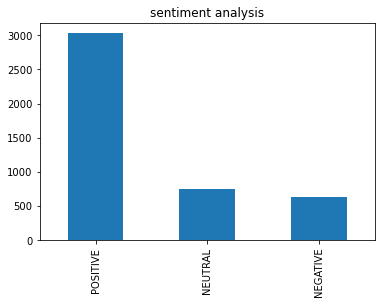

In [111]:
xiaomi.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")
xiaomi_sentiment = xiaomi.sentiment_type.value_counts()
print(xiaomi_sentiment)

positive sentiment percentage = 3032/5574 = 54.3 percent
negative sentiment percentage = 627/5574 = 11.2 percent
nuetral sentiment percentage = 752/5574 = 13.4 percent

In [112]:
#reference for VADER:-https://www.analyticsvidhya.com/blog/2021/01/sentiment-analysis-vader-or-textblob/

#### Conclusion

Comparing the customer sentiments of Apple, Samsung, Motorola and Xiaomi - Apple customers are either very happy with their phones or are quite unhappy. Compared to the other 3 brands, Apple has the highest percentage of negative reviews- 19.4 perecent. It has 53.6 percent positive reviews. 

Samsung has lot of reviewers- 37,701. Among them , 62 percent are positive reviews, 18.5 percent are negative.Among the 4 brands, Samsung has the second highest negative sentiment percentage.

Motorola has 9400 reviews. Among them, 69 percentage are postive reviews, 18.3 percent negative reviews.We can see that Motorola has the highest positive sentiment percentage comapred to the other 3 brands.

However, Xiaomi has 4.4/5 rating. It has the highest average rating comapred to all other brands. However, we can see that it has only 54.3 percentage positive sentiment, a little more than Apple, and has more nuetral sentiment(13.4 percent) than negative sentiment(11.2 percent).  